In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict
import random

from src.data_loader import load_fruit_images
from src.show_images import show_images
from src.center_crop_resize import center_crop_and_resize
from src.show_random_image import plot_random_images
from src.predict_by_color_channel import channel_prediction
from src.test_channel_thresh import find_best_threshold

## Load the images
- Images starting with 'a' are apples.
- Images starting with 'b' are bananas.

In [4]:
folder_path = "/mnt/e/Term 3/Machin-Learning/Projects/01 pro/data/images"
apple_images, banana_images = load_fruit_images(folder_path)

print(f"Number of apple images: {len(apple_images)}")
print(f"Number of banana images: {len(banana_images)}")


Number of apple images: 32
Number of banana images: 30


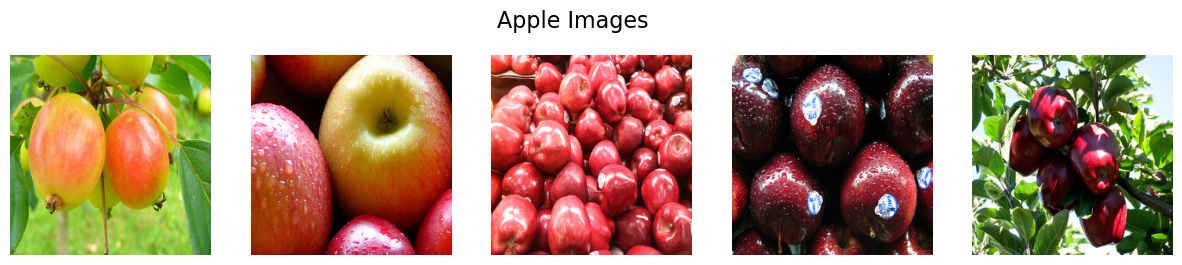

In [5]:
show_images(apple_images, title="Apple Images", max_images=5)

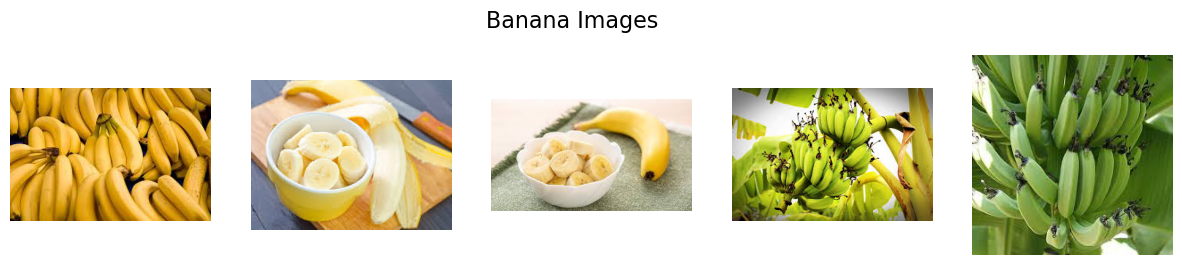

In [6]:
show_images(banana_images, title="Banana Images", max_images=5)

we observe that apple images have equal size but banana images have different sizes. To find all of the sizes with iterate over the images and add any new size to a hashset. 

First we do this for apple images to make sure they are equal in size:

In [7]:
different_sizes = dict()
for image in apple_images:
    different_sizes[image.shape] = different_sizes.get(image.shape, 0) + 1
different_sizes

{(256, 256, 3): 32}

We see that all apple images have (256, 256, 3) size. Now we do this for banana images:

In [8]:
different_sizes = dict()
for image in banana_images:
    different_sizes[image.shape] = different_sizes.get(image.shape, 0) + 1
different_sizes

{(183, 275, 3): 4,
 (194, 259, 3): 2,
 (168, 300, 3): 4,
 (225, 225, 3): 7,
 (195, 259, 3): 2,
 (163, 310, 3): 1,
 (259, 194, 3): 1,
 (168, 299, 3): 1,
 (173, 292, 3): 1,
 (198, 254, 3): 1,
 (194, 260, 3): 1,
 (162, 311, 3): 1,
 (182, 277, 3): 1,
 (170, 297, 3): 1,
 (177, 285, 3): 1,
 (174, 290, 3): 1}

We see that banana images have different sizes and aspect ratios. The most frequent size is (225, 225, 3) which has an aspect ratio of 1:1, just as the apple images. 

Observing the banana images, we notice that in the majority of images the bananas are placed at the center of the image. As a result, we can center crop the images with an aspect ratio of 1:1 and then convert the images to (256, 256, 3), which is the size of apple images.

To do this, we write a function to center crop and resize a list of images:

In [9]:
banana_resized_images = center_crop_and_resize(banana_images)

In [10]:
different_sizes = dict()
for image in banana_resized_images:
    different_sizes[image.shape] = different_sizes.get(image.shape, 0) + 1
different_sizes

{(256, 256, 3): 30}

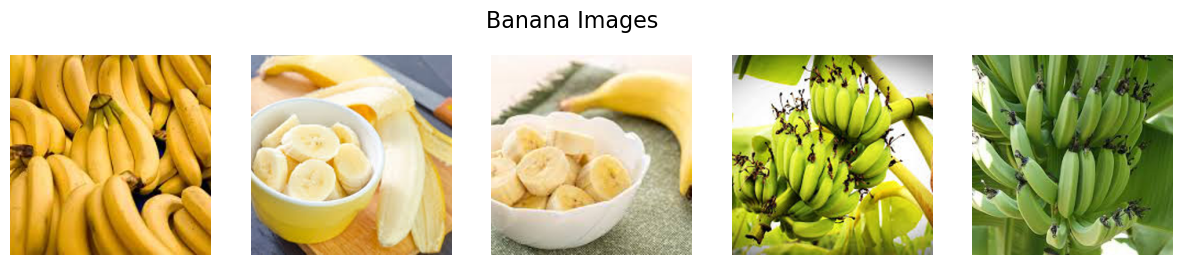

In [11]:
show_images(banana_resized_images, title="Banana Images", max_images=5)

We see that all the banans are recognizable in all images. So our work in this section is finished.

# Classifying the Images

We assign class 0 to apples and class 1 to banans:

In [12]:
xs = np.array(apple_images + banana_resized_images)
ys = np.array([0] * len(apple_images) + [1] * len(banana_resized_images))

Then, we randomly suffle the dataset:

In [13]:
indices = list(range(len(xs)))
np.random.shuffle(indices)
xs = xs[indices]
ys = ys[indices]

In [14]:
xs.shape

(62, 256, 256, 3)

In [15]:
ys.shape

(62,)

We make sure the correctness of the suffling process by plotting the data again:

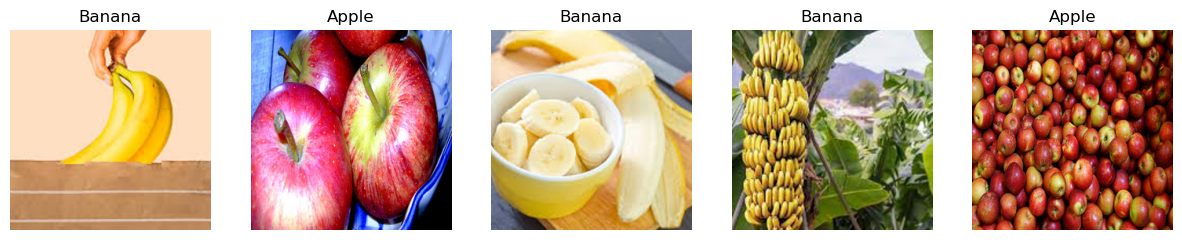

In [16]:
label_names = ['Apple' if y == 0 else 'Banana' for y in ys]
show_images(xs[5:10], label_names[5:10])

### Method 1: Using thresholding per channel

In this method we compute the average values of each channel in the image, and then use a threshold to classify it.

To do this, we implement the `channel_prediction` function, which takes 4 arguments:
- xs: the images
- channel: the channel on which we apply thresholding
- thresh: the threshold value
- target_class: the class to which the sample is assigned if the average value is bigger than the threshold

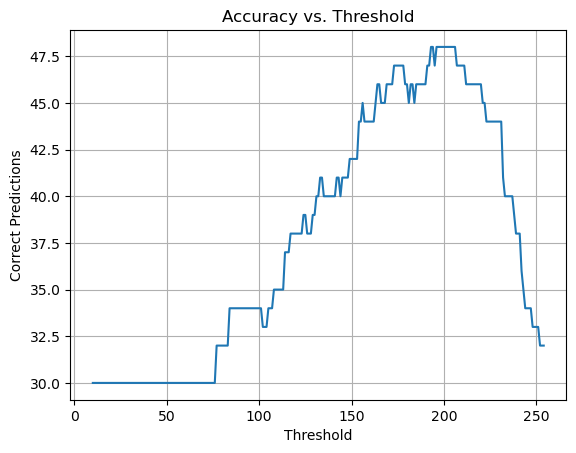

Best threshold: 193
Accuracy: 0.7741935483870968


In [ ]:
best_thresh, acc = find_best_threshold(xs, ys, channel=0, target_class=1, thresh_range=(10, 255))
print("Best threshold:", best_thresh)
print("Accuracy:", acc)

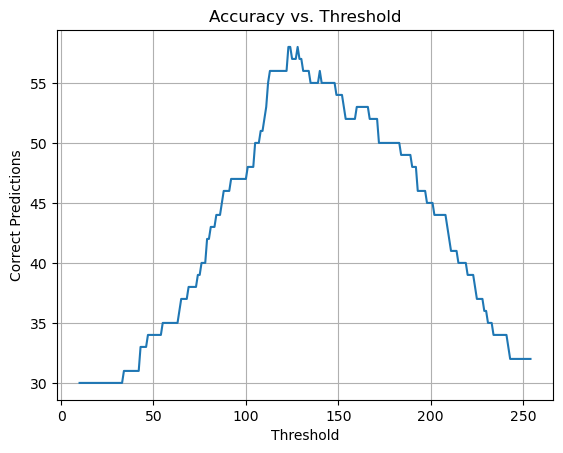

Best threshold: 123
Accuracy: 0.9354838709677419


In [23]:
best_thresh, acc = find_best_threshold(xs, ys, channel=1, target_class=1, thresh_range=(10, 255))
print("Best threshold:", best_thresh)
print("Accuracy:", acc)

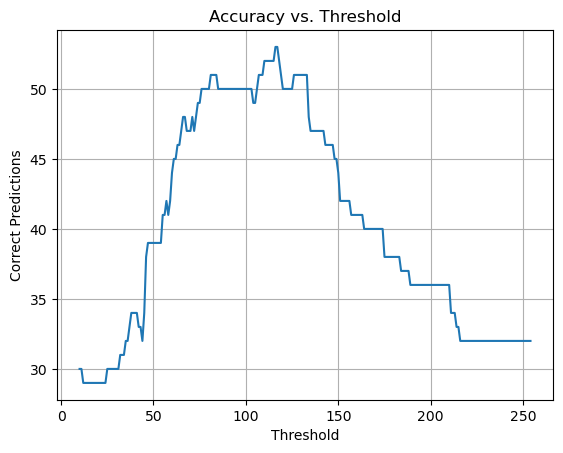

Best threshold: 116
Accuracy: 0.8548387096774194


In [24]:
best_thresh, acc = find_best_threshold(xs, ys, channel=2, target_class=1, thresh_range=(10, 255))
print("Best threshold:", best_thresh)
print("Accuracy:", acc)